# NPX MODEL




# Load libraries

In [191]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Plot the uptake rate

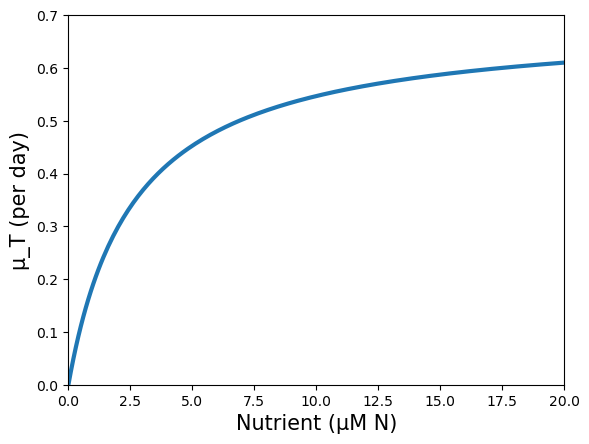

In [192]:
import numpy as np
import matplotlib.pyplot as plt


# define the Parameters
µ = 0.69
k = 2.62
Q10 = 1.88
T = 18
T1 = 18

# Definition of the function
def f(N,µ_T,k):
    
    return (µ_T*(N/(N+k)))
# Definition of the interval
a, b = 0, 20

# Générate values the  function
N = np.linspace(a, b, 200)
µ_T=µ*Q10**((T-T1)/10)
y = f(N,µ_T,k)
# plot the uptake rate
plt.plot(N, y,linewidth=3)

# add a title and axis labels

plt.xlabel('Nutrient (µM N)',fontsize=15)
plt.ylabel('µ_T (per day)',fontsize=15)
plt.xlim(left=0)
plt.xlim(right=20.0)
plt.ylim([0,0.7])



# display the graphic
plt.show()


# Set parameter values

In [193]:
# set all the parameters values

N0=30              # amount of constant nutrient flowing into the nutrient pool N (µmol N per L )
µ=0.69            #maximum uptake rate of nutrient by phytoplankton (per day)
k=2.62             #half-saturation constant for nutrient uptake  (µmol N per L)
m=0.1             #natural mortality of phytoplankton (per day)
D=0.1             #dilution rate  (per day)
delta=0.1        #fraction of toxin production
gamma=0.2          #toxin release rate  (per day)
n_p= 1.12*10**-5   #conversion factor (amount of nutrient per cell)
Q10 = 1.88
T1 = 18
T=10


# Building Python function for the processes

# for T= 10

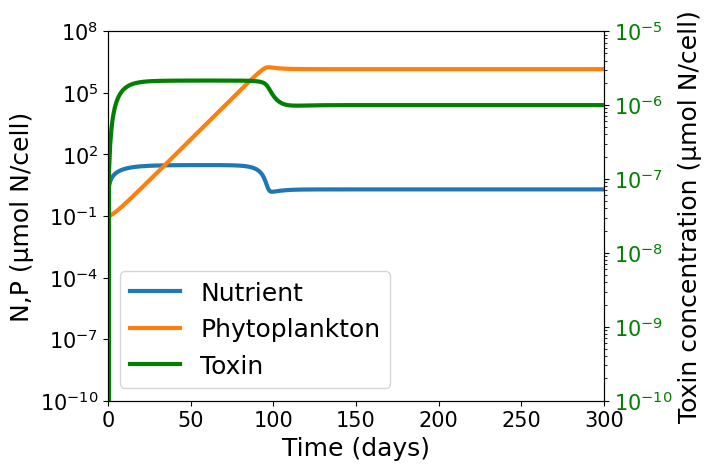

In [194]:
#N nutrient(nitrogen)
#P phytoplankton producing toxin
#X toxin per cell produced by phytoplankton
#Pn  phytoplankton cell amount of nitrogen ($ cells L ^{-1})$)
    
#define the system of differential equation 
    
def system(y, t,N0, μ, k, m, D, delta, gamma, n_p, T1, Q10, T):
        N,P,X=y

        µ_T = µ * Q10**((T - T1) / 10)
        m_T = m * Q10**((T - T1) / 10)
       
        dNdt = D * (N0 - N) - µ_T * N / (N + k) * P * n_p
        dPdt = (1 - delta) * µ_T * N / (N + k) * P - (D + m_T) * P
        dXdt = delta * µ_T * N / (N + k) * n_p - gamma * X
        
        
        return [dNdt, dPdt, dXdt]

# set initial conditions 
y0=[1,0.1,0]
t =np.linspace (0,700 , 1000)
T=10

args = (N0,μ, k, m, D, delta, gamma, n_p, T1, Q10, T)
        
sol = odeint(system, y0,t,args=args) #using odeint function to solve the ODE equation
        
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time (days)',fontsize=18)
ax1.set_ylabel('N,P (µmol N/cell)',fontsize=18)
ax1.plot(t, sol[:, 0], linewidth=3, label='Nutrient')
ax1.plot(t, sol[:, 1], linewidth=3, label='Phytoplankton')
ax1.set_yscale('log')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.set_ylabel('Toxin concentration (µmol N/cell)',fontsize=18)
ax2.plot(t, sol[:, 2], linewidth=3, label='Toxin', color='green')
ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='green')

ax1.set_ylim(1e-10, 1e8)
ax2.set_ylim(1e-10,1e-5)
ax1.set_xlim(left=0)
ax2.set_xlim(left=0)
ax1.set_xlim(right=300)

handles, labels = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
all_handles = handles + handles2
all_labels = labels + labels2
ax1.legend(all_handles, all_labels, fontsize=18)

#increase the size of axis 
ax1.tick_params(axis='both', labelsize=15)
ax2.tick_params(axis='both', labelsize=15)


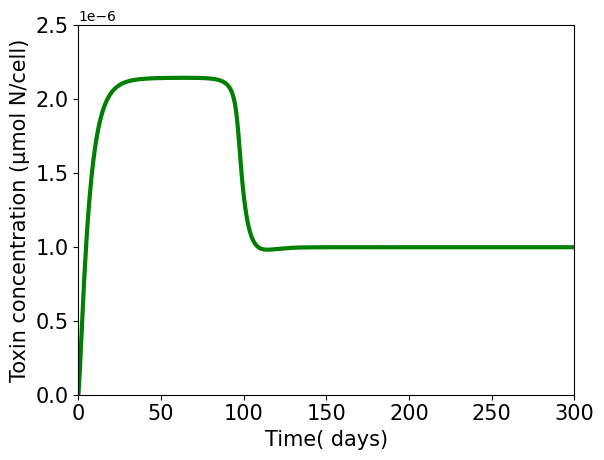

In [195]:
X_10 = sol[:, 2]


# Plot the time series of X
plt.plot(t, X_10,color='green',linewidth=3)

plt.xlabel('Time( days)',fontsize=15)
plt.ylabel('Toxin concentration (µmol N/cell)',fontsize=15)

plt.xlim(left=0)
plt.xlim(right=300)
plt.ylim([0,2.5e-6])
#increase the size of axis 
plt.xticks(fontsize=15)  # Augment the font size of x-axis tick labels
plt.yticks(fontsize=15)  # Augment the font size of y-axis tick labels

plt.show()

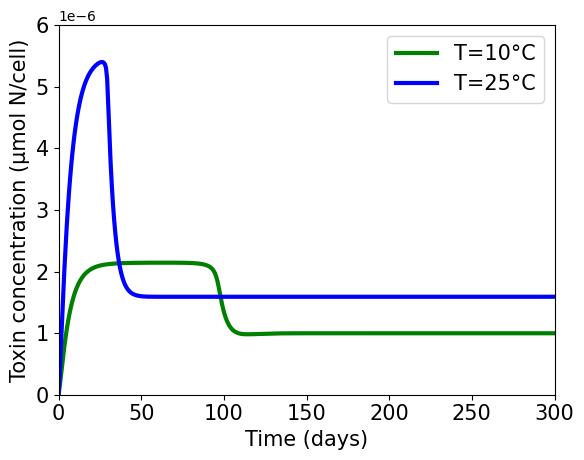

In [196]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the system of equations
def system(y, t, N0, μ, k, m, D, delta, gamma, n_p, T1, Q10, T):
    N, P, X = y

    µ_T = μ * Q10**((T - T1) / 10)
    m_T = m * Q10**((T - T1) / 10)

    dNdt = D * (N0 - N) - µ_T * N / (N + k) * P * n_p
    dPdt = (1 - delta) * µ_T * N / (N + k) * P - (D + m_T) * P
    dXdt = delta * µ_T * N / (N + k) * n_p - gamma * X

    return [dNdt, dPdt, dXdt]

# Set all the parameter values
N0 = 30              # Amount of constant nutrient flowing into the nutrient pool N (µmol N per L)
μ = 0.69            # Maximum uptake rate of nutrient by phytoplankton (per day)
k = 2.62             # Half-saturation constant for nutrient uptake  (µmol N per L)
m = 0.1             # Natural mortality of phytoplankton (per day)
D = 0.1             # Dilution rate  (per day)
delta = 0.1        # Fraction of toxin production
gamma = 0.2          # Toxin release rate  (per day)
n_p = 1.12 * 10**-5   # Conversion factor (amount of nutrient per cell)
Q10 = 1.88
T1 = 18

# Set initial conditions
y0 = [1, 0.1, 0]
t = np.linspace(0, 700, 1000)

# Solve the system of equations for T = 10
T = 10
args = (N0, μ, k, m, D, delta, gamma, n_p, T1, Q10, T)
sol = odeint(system, y0, t, args=args)
X_10 = sol[:, 2]

# Plot the time series of X at T = 10
plt.plot(t, X_10, color='green', linewidth=3, label='T=10°C')

# Solve the system of equations for T = 25
T = 25
args = (N0, μ, k, m, D, delta, gamma, n_p, T1, Q10, T)
sol = odeint(system, y0, t, args=args)
X_25 = sol[:, 2]

# Plot the time series of X at T = 25
plt.plot(t, X_25, color='blue', linewidth=3, label='T=25°C')

plt.xlabel('Time (days)', fontsize=15)
plt.ylabel('Toxin concentration (µmol N/cell)', fontsize=15)

plt.xlim(left=0, right=300)
plt.ylim([0, 6e-6])

# Increase the size of axis labels
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.legend(fontsize=15)
plt.show()


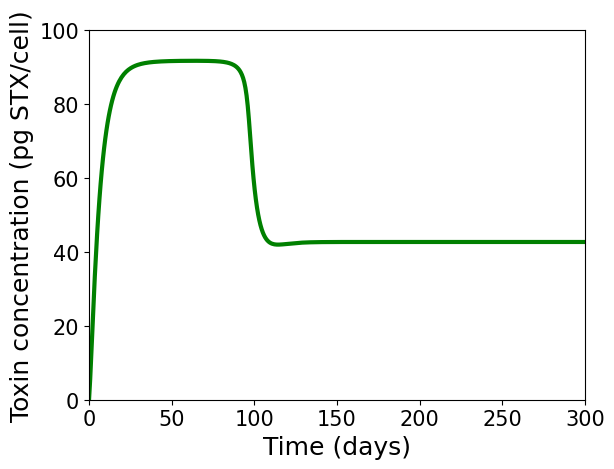

In [197]:
# Define the initial conditions

y0 = [1, 0.1, 0]


# Solve the system of differential equations
sol = odeint(system, y0, t,args=args)


# Extract the time series of X in µmolN/cell
X_umolN_cell = X_10

# Convert X from µmolN/cell to pg of Saxitoxin/cell
X_pg_cell = (X_10 * 14.0067 * 299.29 / 98) * 10**6

# Plot the time series of X
plt.plot(t, X_pg_cell,color='green', linewidth=3)

plt.xlabel('Time (days)',fontsize=18)
plt.ylabel('Toxin concentration (pg STX/cell)',fontsize=18)
plt.xlim(left=0)
plt.xlim(right=300)

plt.xticks(fontsize=15)  # Augment the font size of x-axis tick labels
plt.yticks(fontsize=15)  # Augment the font size of y-axis tick labels


plt.ylim([0,100])
plt.show()


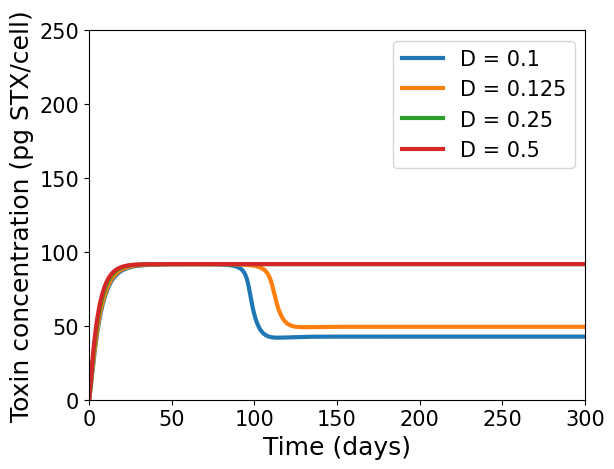

In [198]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def system(y, t, N0, µ, k, m, D, delta, gamma, n_p, T1, Q10):
    N, P, X = y

    µ_T = µ * Q10**((T - T1) / 10)
    m_T = m * Q10**((T - T1) / 10)
    dNdt = D * (N0 - N) - µ_T * N / (N + k) * P * n_p
    dPdt = (1 - delta) * µ_T * N / (N + k) * P - (D + m_T) * P
    dXdt = delta * µ_T * N / (N + k) * n_p - gamma * X

    return [dNdt, dPdt, dXdt]

N_init = 1
P_init = 0.1
X_init = 0
T=10

y0 = [N_init, P_init, X_init]

tspan = np.linspace(0, 700, 1000)

D_values = [0.1, 0.125, 0.25, 0.5]

for D_local in D_values:
    sol = odeint(system, y0, tspan, args=(N0, µ, k, m, D_local, delta, gamma, n_p, T1, Q10))

    X_15 = sol[:, 2]
    X_pg_cell = (X_15 * 14.0067 * 299.29 / 98) * 10**6
    plt.plot(tspan, X_pg_cell, label="D = {}".format(D_local), linewidth=3)

plt.legend()
plt.xlabel('Time (days)', fontsize=18)
plt.ylabel('Toxin concentration (pg STX/cell)', fontsize=18)

plt.xlim(left=0)
plt.xlim(right=300)

plt.xticks(fontsize=15)  # Augment the font size of x-axis tick labels
plt.yticks(fontsize=15)  # Augment the font size of y-axis tick labels

plt.legend(fontsize=15)  # Augment the font size of legend labels

plt.ylim([0, 250])

plt.show()



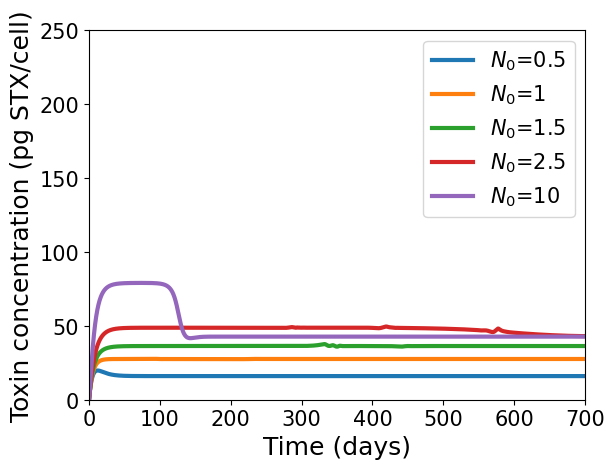

In [141]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def system(y, t, N0, μ, k, m, D, delta, gamma, n_p, T1, Q10,T):
    N, P, X = y

    μ_T = μ * Q10**((T - T1) / 10)
    m_T = m * Q10**((T - T1) / 10)
    dNdt = D * (N0 - N) - μ_T * N / (N + k) * P * n_p
    dPdt = (1 - delta) * μ_T * N / (N + k) * P - (D + m_T) * P
    dXdt = delta * μ_T * N / (N + k) * n_p - gamma * X

    return [dNdt, dPdt, dXdt]

# Define the initial conditions
y0 = [1, 0.1, 0]

# Define the time span
tspan = np.linspace(0, 1000, 10000)

# Define the N0 values to loop through
N0_list = [ 0.5, 1, 1.5, 2.5, 10]

# Loop through the N0 values and plot the time series of X
for N0 in N0_list:
    # Solve the system of differential equations
    sol = odeint(system, y0, tspan, args=(N0, μ, k, m, D, delta, gamma, n_p, T1, Q10,T))

    # Extract the time series of X in µmolN/cell
    X_10 = sol[:, 2]

    # Convert X from µmolN/cell to pg of Saxitoxin/cell
    X_pg_cell = (X_10 * 14.0067 * 299.29 / 98) * 10**6

    # Plot the time series of X for the current N0 value
    plt.plot(tspan, X_pg_cell, label=f'$N_0$={N0}', linewidth=3)

# Add legend and axis labels
plt.legend()
plt.xlabel('Time (days)', fontsize=18)
plt.ylabel('Toxin concentration (pg STX/cell)', fontsize=18)

plt.xticks(fontsize=15)  # Augment the font size of x-axis tick labels
plt.yticks(fontsize=15)  # Augment the font size of y-axis tick labels

plt.legend(fontsize=15)  # Augment the font size of legend labels
plt.xlim(left=0)
plt.xlim(right=700)
plt.ylim([0, 250])

# Show the plot
plt.show()



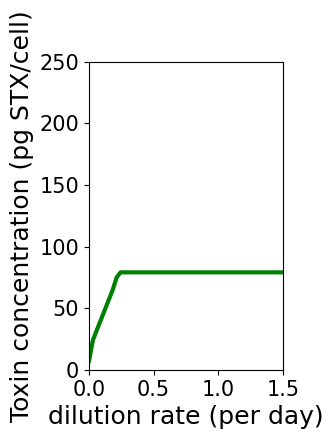

In [120]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def system(y, t, N0, μ, k, m, D, delta, gamma, n_p, T1, Q10,T):
    N, P, X = y

    μ_T = μ * Q10**((T - T1) / 10)
    m_T = m * Q10**((T - T1) / 10)
    dNdt = D * (N0 - N) - μ_T * N / (N + k) * P * n_p
    dPdt = (1 - delta) * μ_T * N / (N + k) * P - (D + m_T) * P
    dXdt = delta * μ_T * N / (N + k) * n_p - gamma * X

    return [dNdt, dPdt, dXdt]

# Define the initial conditions
y0 = [1, 0.1, 0]

# Define the time span
tspan = np.linspace(0, 700, 1000)

# Define the different values of D to be plotted
D_values = np.linspace(0, 1.5, 50)

# Initialize an empty array to store the final values of X for each D value
X_final_values = []

# Solve the system of differential equations for each value of D and store the final value of X in X_final_values
for D in D_values:
    sol = odeint(system, y0, tspan, args=(N0, μ, k, m, D, delta, gamma, n_p, T1, Q10,T))
    X_10 = sol[:, 2]
    
    X_pg_cell = (X_10 * 14.0067 * 299.29 / 98) * 10**6
    
    X_final_values.append(X_pg_cell[-1])

# Plot X as a function of D

plt.figure("subplot example", figsize=(2.5, 4))
plt.plot(D_values, X_final_values, color='green', linewidth=3)

plt.ylim([0, 250])
plt.xlim([0, 1.5]) 
plt.xticks(fontsize=15)  # Augment the font size of x-axis tick labels
plt.yticks(fontsize=15)  # Augment the font size of y-axis tick labels



plt.xlabel('dilution rate (per day)', fontsize=18)
plt.ylabel('Toxin concentration (pg STX/cell)', fontsize=18)
plt.show()


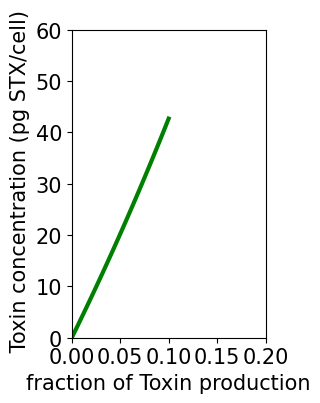

In [121]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def system(y, t, N0, μ, k, m, D, delta, gamma, n_p, T1, Q10,T):
    N, P, X = y

    μ_T = μ * Q10**((T - T1) / 10)
    m_T = m * Q10**((T - T1) / 10)
    dNdt = D * (N0 - N) - μ_T * N / (N + k) * P * n_p
    dPdt = (1 - delta) * μ_T * N / (N + k) * P - (D + m_T) * P
    dXdt = delta * μ_T * N / (N + k) * n_p - gamma * X

    return [dNdt, dPdt, dXdt]

# Define the initial conditions
N_init = 1
P_init = 0.1
X_init = 0
y0 = [N_init, P_init, X_init]

# Define the time span
tspan = np.linspace(0, 700, 1000)

# Define the different values of delta to be plotted
delta_values = np.linspace(0, 0.1, 50)

# Define the dilution rate, N0, and other parameters
D = 0.1
N0 = 30
μ = 0.69  # Define the value of μ
k = 2.62  # Define the value of k
m = 0.1  # Define the value of m
gamma = 0.2  # Define the value of gamma
n_p = 1.12*10**-5  # Define the value of n_p
T1 = 18  # Define the value of T1
Q10 = 1.88  # Define the value of Q10

# Define lists to store the values of X for each value of delta
X_values = []

# Solve the system of differential equations for each value of delta and store the values of X in X_values
for delta in delta_values:
    sol = odeint(system, y0, tspan, args=(N0, μ, k, m, D, delta, gamma, n_p, T1, Q10,T))
    X_10 = sol[:, 2]
    X_pg_cell = (X_10* 14.0067 * 299.29 / 98) * 10**6
    X_values.append(X_pg_cell[-1])

# Plot the values of X for each value of delta

plt.figure("subplot example", figsize=(2.5, 4))


plt.plot(delta_values, X_values, color='green', linewidth=3)

plt.ylim([0, 60])
plt.xlim([0, 0.2])
plt.xticks(fontsize=15)  # Augment the font size of x-axis tick labels
plt.yticks(fontsize=15)  # Augment the font size of y-axis tick labels


plt.xlabel('fraction of Toxin production', fontsize=15)
plt.ylabel(' Toxin concentration (pg STX/cell)', fontsize=15)
plt.show()


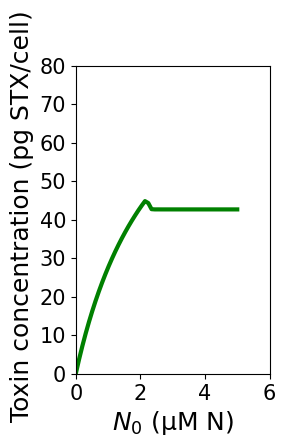

In [142]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def system(y, t, N0, μ, k, m, D, delta, gamma, n_p, T1, Q10,T):
    N, P, X = y

    μ_T = μ * Q10**((T - T1) / 10)
    m_T = m * Q10**((T - T1) / 10)
    dNdt = D * (N0 - N) - μ_T * N / (N + k) * P * n_p
    dPdt = (1 - delta) * μ_T * N / (N + k) * P - (D + m_T) * P
    dXdt = delta * μ_T * N / (N + k) * n_p - gamma * X

    return [dNdt, dPdt, dXdt]

# Define the initial conditions
N_init = 1
P_init = 0.1
X_init = 0

# Define the different values of N0 to be plotted
N0_values = np.linspace(0, 5, 50)

# Define the dilution rate, delta, and other parameters
D = 0.1
delta = 0.1
μ = 0.69  # Define the value of μ
k = 2.62  # Define the value of k
m = 0.1  # Define the value of m
gamma = 0.2  # Define the value of gamma
n_p = 1.12*10**-5  # Define the value of n_p
T1 = 18  # Define the value of T1
Q10 = 1.88  # Define the value of Q10
T=10

# Initialize an empty array to store the final values of X for each N0 value
X_final_values = []

# Solve the system of differential equations for each value of N0 and store the final value of X in X_final_values
for N0 in N0_values:
    sol = odeint(system, [N_init, P_init, X_init], tspan, args=(N0, μ, k, m, D, delta, gamma, n_p, T1, Q10,T))
    X_10 = sol[:, 2]
    X_pg_cell = (X_10 * 14.0067 * 299.29 / 98) * 10**6
    X_final_values.append(X_pg_cell[-1])

# Plot X as a function of N0

plt.figure("subplot example", figsize=(2.5, 4))


plt.plot(N0_values, X_final_values, color='green', linewidth=3)

plt.xlim([0, 6])
plt.ylim([0, 80])
plt.xticks(fontsize=15)  # Augment the font size of x-axis tick labels
plt.yticks(fontsize=15)  # Augment the font size of y-axis tick labels


plt.xlabel('$N_0$ (µM N)', fontsize=18)
plt.ylabel(' Toxin concentration (pg STX/cell)', fontsize=18)
plt.show()


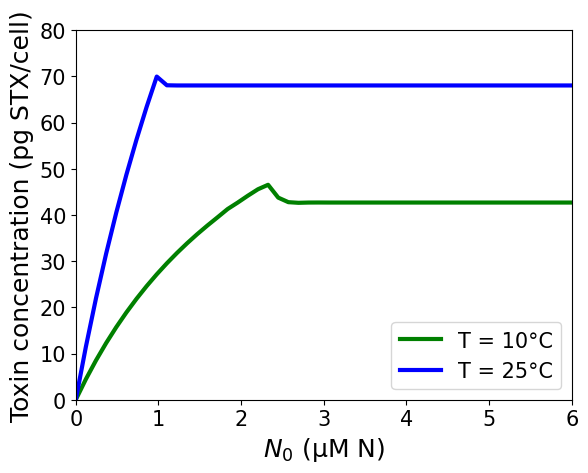

In [161]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def system(y, t, N0, μ, k, m, D, delta, gamma, n_p, T1, Q10, T):
    N, P, X = y

    μ_T = μ * Q10**((T - T1) / 10)
    m_T = m * Q10**((T - T1) / 10)
    dNdt = D * (N0 - N) - μ_T * N / (N + k) * P * n_p
    dPdt = (1 - delta) * μ_T * N / (N + k) * P - (D + m_T) * P
    dXdt = delta * μ_T * N / (N + k) * n_p - gamma * X

    return [dNdt, dPdt, dXdt]

# Define the initial conditions
N_init = 1
P_init = 0.1
X_init = 0

# Define the time span
tspan = np.linspace(0, 700, 1000)

# Define the different values of N0 to be plotted
N0_values = np.linspace(0, 6, 50)

# Define the dilution rate, delta, and other parameters
D = 0.1
delta = 0.1
μ = 0.69  # Define the value of μ
k = 2.62  # Define the value of k
m = 0.1  # Define the value of m
gamma = 0.2  # Define the value of gamma
n_p = 1.12*10**-5  # Define the value of n_p
T1 = 18  # Define the value of T1
Q10 = 1.88  # Define the value of Q10

# Initialize empty arrays to store the final values of X for each N0 value at T=10 and T=25
X_final_values_T10 = []
X_final_values_T25 = []

# Solve the system of differential equations for each value of N0 and store the final value of X at T=10 and T=25
for N0 in N0_values:
    sol_T10 = odeint(system, [N_init, P_init, X_init], tspan, args=(N0, μ, k, m, D, delta, gamma, n_p, T1, Q10, 10))
    sol_T25 = odeint(system, [N_init, P_init, X_init], tspan, args=(N0, μ, k, m, D, delta, gamma, n_p, T1, Q10, 25))
    
    X_T10 = sol_T10[:, 2]
    X_T25 = sol_T25[:, 2]
    
    X_pg_cell_T10 = (X_T10 * 14.0067 * 299.29 / 98) * 10**6
    X_pg_cell_T25 = (X_T25 * 14.0067 * 299.29 / 98) * 10**6
    
    X_final_values_T10.append(X_pg_cell_T10[-1])
    X_final_values_T25.append(X_pg_cell_T25[-1])

# Plot the final concentration of STX as a function of N0 for T=10 and T=25
plt.plot(N0_values, X_final_values_T10, color='green',linewidth=3, label='T = 10°C')
plt.plot(N0_values, X_final_values_T25, color='blue', linewidth=3,label='T = 25°C')

plt.xlim([0, 6])
plt.ylim([0, 80])

plt.xlabel('$N_0$ (µM N)', fontsize=18)
plt.ylabel('Toxin concentration (pg STX/cell)', fontsize=18)
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()


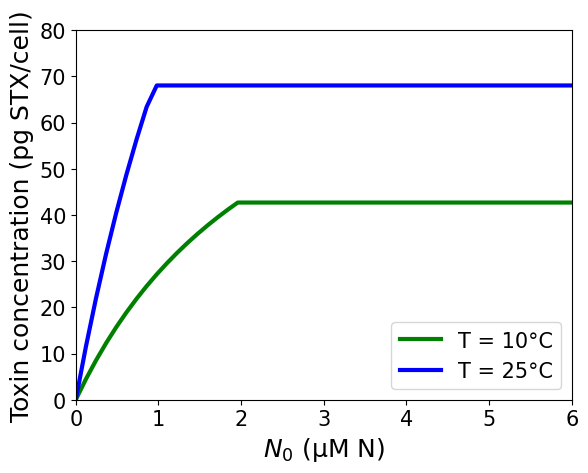

In [124]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def system(y, t, N0, μ, k, m, D, delta, gamma, n_p, T1, Q10, T):
    N, P, X = y

    μ_T = μ * Q10**((T - T1) / 10)
    m_T = m * Q10**((T - T1) / 10)
    dNdt = D * (N0 - N) - μ_T * N / (N + k) * P * n_p
    dPdt = (1 - delta) * μ_T * N / (N + k) * P - (D + m_T) * P
    dXdt = delta * μ_T * N / (N + k) * n_p - gamma * X

    return [dNdt, dPdt, dXdt]

# Define the initial conditions
N_init = 1
P_init = 0.1
X_init = 0

# Define the time span
tspan = np.linspace(0, 7000, 10000)

# Define the different values of N0 to be plotted
N0_values = np.linspace(0, 6, 50)

# Define the dilution rate, delta, and other parameters
D = 0.1
delta = 0.1
μ = 0.69  # Define the value of μ
k = 2.62  # Define the value of k
m = 0.1  # Define the value of m
gamma = 0.2  # Define the value of gamma
n_p = 1.12*10**-5  # Define the value of n_p
T1 = 18  # Define the value of T1
Q10 = 1.88  # Define the value of Q10

# Initialize empty arrays to store the final values of X for each N0 value at T=10 and T=25
X_final_values_T10 = []
X_final_values_T25 = []

# Solve the system of differential equations for each value of N0 and store the final value of X at T=10 and T=25
for N0 in N0_values:
    sol_T10 = odeint(system, [N_init, P_init, X_init], tspan, args=(N0, μ, k, m, D, delta, gamma, n_p, T1, Q10, 10))
    sol_T25 = odeint(system, [N_init, P_init, X_init], tspan, args=(N0, μ, k, m, D, delta, gamma, n_p, T1, Q10, 25))
    
    X_T10 = sol_T10[:, 2]
    X_T25 = sol_T25[:, 2]
    
    X_pg_cell_T10 = (X_T10 * 14.0067 * 299.29 / 98) * 10**6
    X_pg_cell_T25 = (X_T25 * 14.0067 * 299.29 / 98) * 10**6
    
    X_final_values_T10.append(X_pg_cell_T10[-1])
    X_final_values_T25.append(X_pg_cell_T25[-1])

# Plot the final concentration of STX as a function of N0 for T=10 and T=25
plt.plot(N0_values, X_final_values_T10, color='green', linewidth=3, label='T = 10°C')
plt.plot(N0_values, X_final_values_T25, color='blue', linewidth=3, label='T = 25°C')

plt.xlim([0, 6])
plt.ylim([0, 80])

plt.xlabel('$N_0$ (µM N)', fontsize=18)
plt.ylabel('Toxin concentration (pg STX/cell)', fontsize=18)
plt.legend(fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()


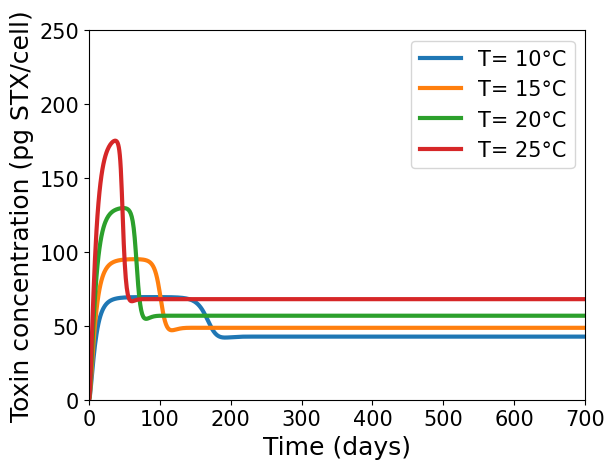

In [144]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def system(y, t):
    N, P, X = y

    µ_T = µ * Q10**((T - T1) / 10)
    m_T = m * Q10**((T - T1) / 10)
    dNdt = D * (N0 - N) - µ_T * N / (N + k) * P * n_p
    dPdt = (1 - delta) * µ_T * N / (N + k) * P - (D + m_T) * P
    dXdt = delta * µ_T * N / (N + k) * n_p - gamma * X
   

    return [dNdt, dPdt, dXdt]

y0 = [0,0.1, 0]

tspan = np.linspace(0, 700, 1000)

T_values = [10 ,15 ,20 ,25,]

for T in T_values:
    sol = odeint(system, y0, tspan)
    X_10= sol[:, 2]
    X_pg_cell = (X_10 * 14.0067 * 299.29 / 98) * 10**6
    plt.plot(tspan, X_pg_cell, label="T= {}°C".format(T),linewidth=3)

plt.legend(fontsize=15)
plt.xlabel('Time (days)',fontsize=18)
plt.ylabel('Toxin concentration (pg STX/cell)',fontsize=18)

plt.xlim(left=0)
plt.xlim(right=700)

plt.ylim([0, 250])
#increase the size of axis 
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()


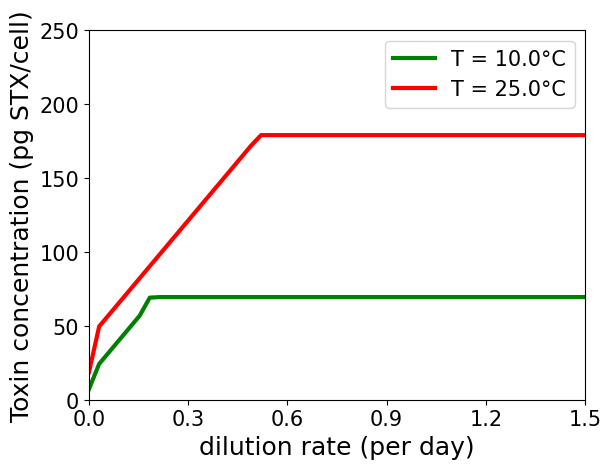

In [162]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def system(y, t, N0, μ, k, m, D, delta, gamma, n_p, T1, Q10, T):
    N, P, X = y

    μ_T = μ * Q10**((T - T1) / 10)
    m_T = m * Q10**((T - T1) / 10)
    dNdt = D * (N0 - N) - μ_T * N / (N + k) * P * n_p
    dPdt = (1 - delta) * μ_T * N / (N + k) * P - (D + m_T) * P
    dXdt = delta * μ_T * N / (N + k) * n_p - gamma * X

    return [dNdt, dPdt, dXdt]

# Define the initial conditions
y0 = [1, 0.1, 0]

# Define the time span
tspan = np.linspace(0, 700, 1000)

# Define the different values of D to be plotted
D_values = np.linspace(0, 1.5, 50)

# Define the temperature values
T1 = 18
Q10 = 1.88
T_values = np.linspace(10, 25, 2)

# Define the colors for the toxins
colors = ['green', 'red']

# Initialize an empty array to store the final values of X for each D value
X_final_values = []

# Plot the concentration of toxins for each temperature with the corresponding color
for i, T in enumerate(T_values):
    X_final_values = []
    for D in D_values:
        sol = odeint(system, y0, tspan, args=(N0, μ, k, m, D, delta, gamma, n_p, T1, Q10, T))
        X_10 = sol[:, 2]
        X_pg_cell = (X_10 * 14.0067 * 299.29 / 98) * 10**6
        X_final_values.append(X_pg_cell[-1])
    plt.plot(D_values, X_final_values, color=colors[i], linewidth=3, label='T = {}°C'.format(T))

plt.legend(fontsize=15)

plt.ylim([0, 250])
plt.xlim([0, 1.5])

plt.xlabel('dilution rate (per day)', fontsize=18)
plt.ylabel('Toxin concentration (pg STX/cell)', fontsize=18)
plt.xticks(np.arange(0, 1.6, 0.3), fontsize=15)

plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()


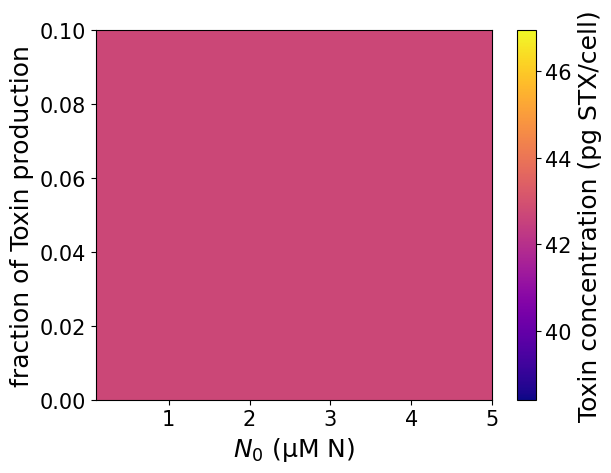

In [101]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the range of values for N0 and delta
N0_values = np.linspace(0.1, 5, 50)
delta_values = np.linspace(0, 0.1, 50)

# Define the dilution rate
D = 0.1
T=10

# Define an empty matrix to store the values of X for each combination of delta and N0
X_map = np.zeros((len(delta_values), len(N0_values)))

# Loop over each combination of delta and N0 and solve the system of differential equations
for i, delta_local in enumerate(delta_values):
    for j, N0_local in enumerate(N0_values):
        y0 = [N_init, P_init, X_init]
        sol = odeint(system, [N_init, P_init, X_init], tspan, args=(N0, μ, k, m, D, delta, gamma, n_p, T1, Q10,T))
        X_10 = sol[:, 2]
        X_pg_cell = (X_10 * 14.0067 * 299.29 / 98) * 10 ** 6
        X_map[i, j] = X_pg_cell[-1]

# Plot the 2D map
plt.imshow(X_map, extent=[N0_values.min(), N0_values.max(), delta_values.min(), delta_values.max()], origin='lower', aspect='auto', cmap='plasma')
cbar = plt.colorbar()
cbar.set_label('Toxin concentration (pg STX/cell)', fontsize=18)  # Set fontsize of the colorbar label
cbar.ax.tick_params(labelsize=15)  # Set fontsize of the colorbar tick labels
plt.xlabel('$N_0$ (µM N)', fontsize=18)
plt.ylabel('fraction of Toxin production', fontsize=18)
# Increase the size of tick labels on x and y axes
plt.tick_params(axis='both', which='major', labelsize=15)

plt.show()









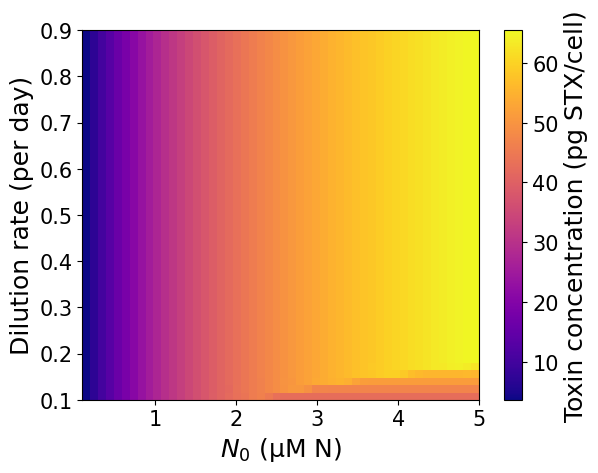

In [102]:
# Define the initial conditions
N_init = 1
P_init = 0.1
X_init = 0



# Define the range of values for N0 and dilution rate
N0_values = np.linspace(0.1, 5, 50)
D_values = np.linspace(0.1, 0.9, 50)

# Define the toxin production fraction delta
delta = 0.1
T=10

# Define an empty matrix to store the values of X for each combination of N0 and dilution rate
X_map = np.zeros((len(D_values), len(N0_values)))

# Loop over each combination of N0 and dilution rate and solve the system of differential equations
for i, D in enumerate(D_values):
    for j, N0 in enumerate(N0_values):
        y0 = [N_init, P_init, X_init]
        sol = odeint(system, [N_init, P_init, X_init], tspan, args=(N0, μ, k, m, D, delta, gamma, n_p, T1, Q10,T))
        X_10 = sol[:, 2]
        X_pg_cell = (X_10 * 14.0067 * 299.29 / 98) * 10**6
        X_map[i, j] = X_pg_cell[-1]

# Plot the 2D map
plt.imshow(X_map, extent=[N0_values.min(), N0_values.max(), D_values.min(), D_values.max()], origin='lower', aspect='auto', cmap='plasma')
cbar= plt.colorbar()
cbar.set_label('Toxin concentration (pg STX/cell)',fontsize=18)
plt.xlabel('$N_0$ (µM N)',fontsize=18)
cbar.ax.tick_params(labelsize=15)  # Set fontsize of the colorbar tick labels
plt.ylabel('Dilution rate (per day)',fontsize=18)

# Increase the size of tick labels on x and y axes
plt.tick_params(axis='both', which='major', labelsize=15)

plt.show()




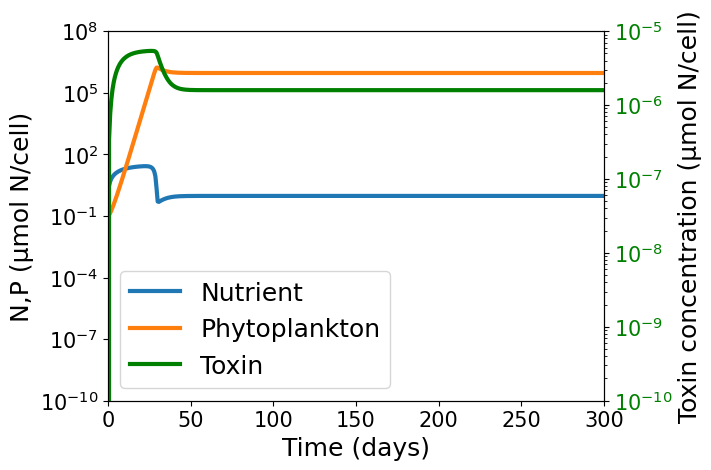

In [164]:
#N nutrient(nitrogen)
#P phytoplankton producing toxin
#X toxin per cell produced by phytoplankton
#Pn  phytoplankton cell amount of nitrogen ($ cells L ^{-1})$)

N0=30              # amount of constant nutrient flowing into the nutrient pool N (µmol N per L )
µ=0.69            #maximum uptake rate of nutrient by phytoplankton (per day)
k=2.62             #half-saturation constant for nutrient uptake  (µmol N per L)
m=0.1             #natural mortality of phytoplankton (per day)
D=0.1             #dilution rate  (per day)
delta=0.1        #fraction of toxin production
gamma=0.2          #toxin release rate  (per day)
n_p= 1.12*10**-5   #conversion factor (amount of nutrient per cell)
Q10 = 1.88
T1 = 18
T= 25
    
#define the system of differential equation 
    
def system(y, t, μ, k, m, D, delta, gamma, n_p, T1, Q10, T):
        N,P,X=y

        µ_T = µ * Q10**((T - T1) / 10)
        m_T = m * Q10**((T - T1) / 10)
       
        dNdt = D * (N0 - N) - µ_T * N / (N + k) * P * n_p
        dPdt = (1 - delta) * µ_T * N / (N + k) * P - (D + m_T) * P
        dXdt = delta * µ_T * N / (N + k) * n_p - gamma * X
        
        
        return [dNdt, dPdt, dXdt]

# set initial conditions 
y0=[1,0.1,0]
t =np.linspace (0,700 , 1000)

args = (μ, k, m, D, delta, gamma, n_p, T1, Q10, T)


        
sol = odeint(system, y0,t,args=args) #using odeint function to solve the ODE equation
        
fig, ax1 = plt.subplots()

ax1.set_xlabel('Time (days)',fontsize=18)
ax1.set_ylabel('N,P (µmol N/cell)',fontsize=18)
ax1.plot(t, sol[:, 0], linewidth=3, label='Nutrient')
ax1.plot(t, sol[:, 1], linewidth=3, label='Phytoplankton')
ax1.set_yscale('log')
ax1.tick_params(axis='y')

ax2 = ax1.twinx()
ax2.set_ylabel('Toxin concentration (µmol N/cell)',fontsize=18)
ax2.plot(t, sol[:, 2], linewidth=3, label='Toxin', color='green')
ax2.set_yscale('log')
ax2.tick_params(axis='y', labelcolor='green')

ax1.set_ylim(1e-10, 1e8)
ax2.set_ylim(1e-10,1e-5)
ax1.set_xlim(left=0)
ax2.set_xlim(left=0)
ax1.set_xlim(right=300)

handles, labels = ax1.get_legend_handles_labels()
handles2, labels2 = ax2.get_legend_handles_labels()
all_handles = handles + handles2
all_labels = labels + labels2
ax1.legend(all_handles, all_labels, fontsize=18)
#increase the size of axis 
ax1.tick_params(axis='both', labelsize=15)
ax2.tick_params(axis='both', labelsize=15)



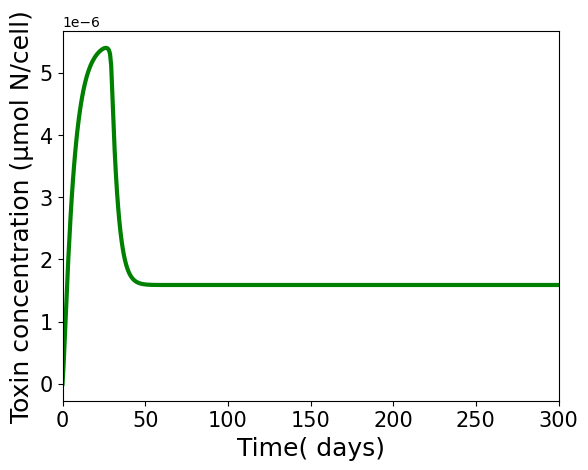

In [165]:
X_25 = sol[:, 2]


# Plot the time series of X
plt.plot(t, X_25,color='green',linewidth=3)

plt.xlabel('Time( days)',fontsize=18)
plt.ylabel('Toxin concentration (µmol N/cell)',fontsize=18)

plt.xlim(left=0)
plt.xlim(right=300)
#plt.xticks(fontsize=15)  # Augment the font size of x-axis tick labels
#plt.yticks(fontsize=15)  # Augment the font size of y-axis tick labels

plt.tick_params(axis='both', labelsize=15)  # Augment the font size of tick labels on both axes

plt.show()

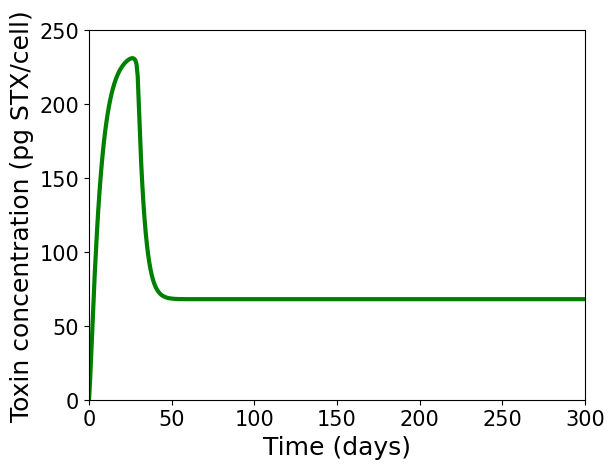

In [166]:
# Define the initial conditions

y0 = [1, 0.1, 0]


# Solve the system of differential equations
sol = odeint(system, y0, t,args=args)


# Extract the time series of X in µmolN/cell
X_umolN_cell = X_25

# Convert X from µmolN/cell to pg of Saxitoxin/cell
X_pg_cell = (X_25* 14.0067 * 299.29 / 98) * 10**6

# Plot the time series of X
plt.plot(t, X_pg_cell,color='green', linewidth=3)

plt.xlabel('Time (days)',fontsize=18)
plt.ylabel('Toxin concentration (pg STX/cell)',fontsize=18)
plt.xlim(left=0)
plt.xlim(right=300)
plt.tick_params(axis='both', labelsize=15)  # Augment the font size of tick labels on both axes


plt.ylim([0,250])
plt.show()


ValueError: x and y must have same first dimension, but have shapes (1000,) and (0,)

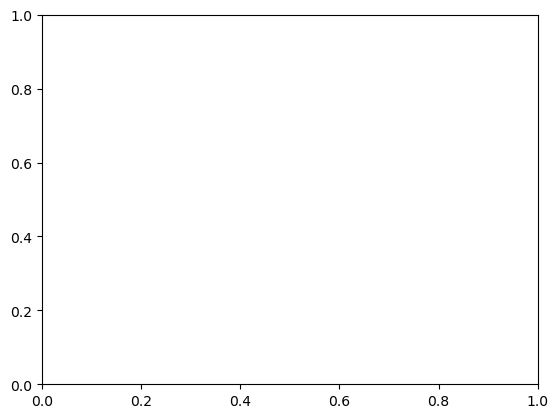

In [199]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def system(y, t, N0, μ, k, m, D, delta, gamma, n_p, T1, Q10, T):
    N, P, X = y

    μ_T = μ * Q10**((T - T1) / 10)
    m_T = m * Q10**((T - T1) / 10)
    dNdt = D * (N0 - N) - μ_T * N / (N + k) * P * n_p
    dPdt = (1 - delta) * μ_T * N / (N + k) * P - (D + m_T) * P
    dXdt = delta * μ_T * N / (N + k) * n_p - gamma * X

    return [dNdt, dPdt, dXdt]

# Define the initial conditions
N_init = 1
P_init = 0.1
X_init = 0

# Define the time span
#tspan = np.linspace(0, 700, 1000)

# Define the dilution rate, delta, and other parameters
D = 0.1
delta = 0.1
μ = 0.69  # Define the value of μ
k = 2.62  # Define the value of k
m = 0.1  # Define the value of m
gamma = 0.2  # Define the value of gamma
n_p = 1.12*10**-5  # Define the value of n_p
T1 = 18  # Define the value of T1
Q10 = 1.88  # Define the value of Q10

# Initialize empty arrays to store the final values of X for each N0 value at T=10 and T=25
X_final_values_T10 = []
X_final_values_T25 = []

# Solve the system of differential equations for each value of N0 and store the final value of X at T=10 and T=25
for N0 in N0_values:
    sol_T10 = odeint(system, [N_init, P_init, X_init], tspan, args=(N0, μ, k, m, D, delta, gamma, n_p, T1, Q10, 10))
    sol_T25 = odeint(system, [N_init, P_init, X_init], tspan, args=(N0, μ, k, m, D, delta, gamma, n_p, T1, Q10, 25))
    
    X_T10 = sol_T10[:, 2]
    X_T25 = sol_T25[:, 2]
    
    X_pg_cell_T10 = (X_T10 * 14.0067 * 299.29 / 98) * 10**6
    X_pg_cell_T25 = (X_T25 * 14.0067 * 299.29 / 98) * 10**6
    
   # X_final_values_T10.append(X_pg_cell_T10[-1])
    #X_final_values_T25.append(X_pg_cell_T25[-1])

# Plot the final concentration of STX as a function of N0 for T=10 and T=25
plt.plot(t,X_final_values_T10, color='green',linewidth=3, label='T = 10°C')
plt.plot(t,X_final_values_T25, color='blue', linewidth=3,label='T = 25°C')

#plt.xlim([0, 6])
#plt.ylim([0, 80])

plt.xlabel('Time (days)', fontsize=18)
plt.ylabel('Toxin concentration (pg STX/cell)', fontsize=18)
plt.legend(fontsize=15)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.show()


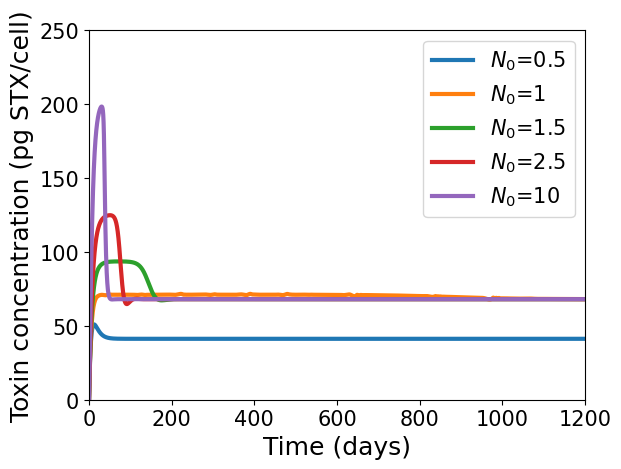

In [131]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def system(y, t, N0, μ, k, m, D, delta, gamma, n_p, T1, Q10,T):
    N, P, X = y

    μ_T = μ * Q10**((T - T1) / 10)
    m_T = m * Q10**((T - T1) / 10)
    dNdt = D * (N0 - N) - μ_T * N / (N + k) * P * n_p
    dPdt = (1 - delta) * μ_T * N / (N + k) * P - (D + m_T) * P
    dXdt = delta * μ_T * N / (N + k) * n_p - gamma * X

    return [dNdt, dPdt, dXdt]

# Define the initial conditions
y0 = [1, 0.1, 0]

# Define the time span
tspan = np.linspace(0, 2000, 10000)

# Define the N0 values to loop through
N0_list = [ 0.5, 1, 1.5, 2.5, 10]

# Loop through the N0 values and plot the time series of X
for N0 in N0_list:
    # Solve the system of differential equations
    sol = odeint(system, y0, tspan, args=(N0, μ, k, m, D, delta, gamma, n_p, T1, Q10,T))

    # Extract the time series of X in µmolN/cell
    X_25 = sol[:, 2]

    # Convert X from µmolN/cell to pg of Saxitoxin/cell
    X_pg_cell = (X_25 * 14.0067 * 299.29 / 98) * 10**6

    # Plot the time series of X for the current N0 value
    plt.plot(tspan, X_pg_cell, label=f'$N_0$={N0}', linewidth=3)

# Add legend and axis labels
plt.legend()
plt.legend(fontsize=15)
plt.xlabel('Time (days)', fontsize=18)
plt.ylabel('Toxin concentration (pg STX/cell)', fontsize=18)
plt.tick_params(axis='both', labelsize=15)  # Augment the font size of tick labels on both axes


plt.xlim(left=0)
plt.xlim(right=1200)
plt.ylim([0, 250])

# Show the plot
plt.show()


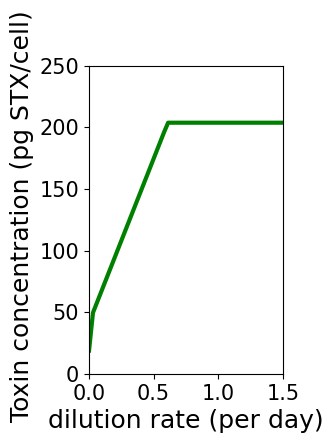

In [108]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def system(y, t, N0, μ, k, m, D, delta, gamma, n_p, T1, Q10,T):
    N, P, X = y

    μ_T = μ * Q10**((T - T1) / 10)
    m_T = m * Q10**((T - T1) / 10)
    dNdt = D * (N0 - N) - μ_T * N / (N + k) * P * n_p
    dPdt = (1 - delta) * μ_T * N / (N + k) * P - (D + m_T) * P
    dXdt = delta * μ_T * N / (N + k) * n_p - gamma * X

    return [dNdt, dPdt, dXdt]

# Define the initial conditions
y0 = [1, 0.1, 0]

# Define the time span
tspan = np.linspace(0, 700, 1000)

# Define the different values of D to be plotted
D_values = np.linspace(0, 1.5, 50)

# Initialize an empty array to store the final values of X for each D value
X_final_values = []

# Solve the system of differential equations for each value of D and store the final value of X in X_final_values
for D in D_values:
    sol = odeint(system, y0, tspan, args=(N0, μ, k, m, D, delta, gamma, n_p, T1, Q10,T))
    X_25 = sol[:, 2]
    
    X_pg_cell = (X_25 * 14.0067 * 299.29 / 98) * 10**6
    
    X_final_values.append(X_pg_cell[-1])

# Plot X as a function of D

plt.figure("subplot example", figsize=(2.5, 4))
plt.plot(D_values, X_final_values, color='green', linewidth=3)

plt.ylim([0, 250])
plt.xlim([0, 1.5]) 
plt.tick_params(axis='both', labelsize=15)  # Augment the font size of tick labels on both axes



plt.xlabel('dilution rate (per day)', fontsize=18)
plt.ylabel(' Toxin concentration (pg STX/cell)', fontsize=18)
plt.show()


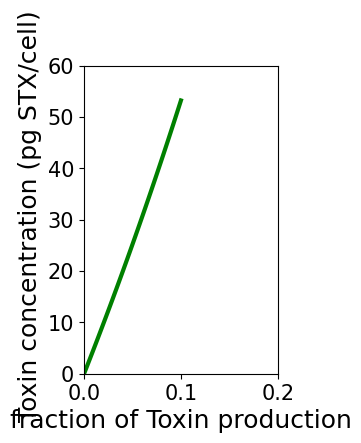

In [109]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def system(y, t, N0, μ, k, m, D, delta, gamma, n_p, T1, Q10,T):
    N, P, X = y

    μ_T = μ * Q10**((T - T1) / 10)
    m_T = m * Q10**((T - T1) / 10)
    dNdt = D * (N0 - N) - μ_T * N / (N + k) * P * n_p
    dPdt = (1 - delta) * μ_T * N / (N + k) * P - (D + m_T) * P
    dXdt = delta * μ_T * N / (N + k) * n_p - gamma * X

    return [dNdt, dPdt, dXdt]

# Define the initial conditions
N_init = 1
P_init = 0.1
X_init = 0
y0 = [N_init, P_init, X_init]

# Define the time span
tspan = np.linspace(0, 700, 1000)

# Define the different values of delta to be plotted
delta_values = np.linspace(0, 0.1, 50)

# Define the dilution rate, N0, and other parameters
D = 0.1
N0 = 30
μ = 0.69  # Define the value of μ
k = 2.62  # Define the value of k
m = 0.1  # Define the value of m
gamma = 0.2  # Define the value of gamma
n_p = 1.12*10**-5  # Define the value of n_p
T1 = 25  # Define the value of T1
Q10 = 1.88  # Define the value of Q10
T=25

# Define lists to store the values of X for each value of delta
X_values = []

# Solve the system of differential equations for each value of delta and store the values of X in X_values
for delta in delta_values:
    sol = odeint(system, y0, tspan, args=(N0, μ, k, m, D, delta, gamma, n_p, T1, Q10,T))
    X_25 = sol[:, 2]
    X_pg_cell = (X_25* 14.0067 * 299.29 / 98) * 10**6
    X_values.append(X_pg_cell[-1])

# Plot the values of X for each value of delta

plt.figure("subplot example", figsize=(2.5, 4))


plt.plot(delta_values, X_values, color='green', linewidth=3)

plt.ylim([0, 60])
plt.xlim([0, 0.2]) 

plt.xlabel('fraction of Toxin production', fontsize=18)
plt.ylabel(' Toxin concentration (pg STX/cell)', fontsize=18)
plt.tick_params(axis='both', labelsize=15)  # Augment the font size of tick labels on both axes

plt.show()


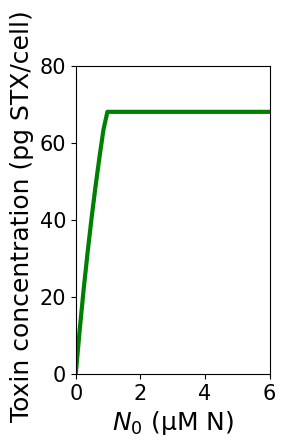

In [132]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def system(y, t, N0, μ, k, m, D, delta, gamma, n_p, T1, Q10,T):
    N, P, X = y

    μ_T = μ * Q10**((T - T1) / 10)
    m_T = m * Q10**((T - T1) / 10)
    dNdt = D * (N0 - N) - μ_T * N / (N + k) * P * n_p
    dPdt = (1 - delta) * μ_T * N / (N + k) * P - (D + m_T) * P
    dXdt = delta * μ_T * N / (N + k) * n_p - gamma * X

    return [dNdt, dPdt, dXdt]

# Define the initial conditions
N_init = 1
P_init = 0.1
X_init = 0

# Define the different values of N0 to be plotted
N0_values = np.linspace(0, 6, 50)

# Define the dilution rate, delta, and other parameters
D = 0.1
delta = 0.1
μ = 0.69  # Define the value of μ
k = 2.62  # Define the value of k
m = 0.1  # Define the value of m
gamma = 0.2  # Define the value of gamma
n_p = 1.12*10**-5  # Define the value of n_p
T1 = 18  # Define the value of T1
Q10 = 1.88  # Define the value of Q10
T=25

# Initialize an empty array to store the final values of X for each N0 value
X_final_values = []

# Solve the system of differential equations for each value of N0 and store the final value of X in X_final_values
for N0 in N0_values:
    sol = odeint(system, [N_init, P_init, X_init], tspan, args=(N0, μ, k, m, D, delta, gamma, n_p, T1, Q10,T))
    X_25 = sol[:, 2]
    X_pg_cell = (X_25 * 14.0067 * 299.29 / 98) * 10**6
    X_final_values.append(X_pg_cell[-1])

# Plot X as a function of N0

plt.figure("subplot example", figsize=(2.5, 4))


plt.plot(N0_values, X_final_values, color='green', linewidth=3)

plt.xlim([0, 6])
plt.ylim([0, 80])

plt.xlabel('$N_0$ (µM N)', fontsize=18)
plt.ylabel(' Toxin concentration (pg STX/cell)', fontsize=18)
plt.tick_params(axis='both', labelsize=15)  # Augment the font size of tick labels on both axes

plt.show()


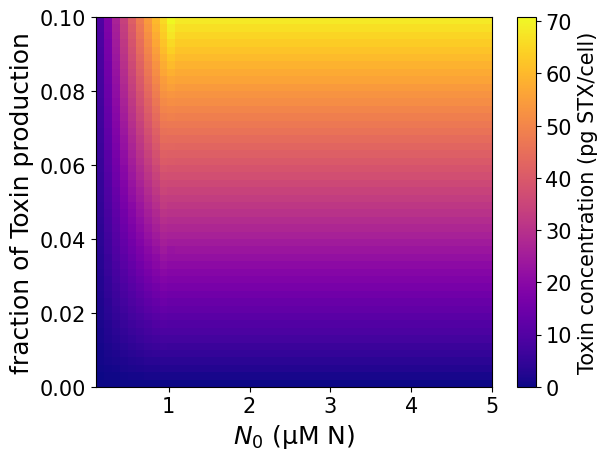

In [53]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the range of values for N0 and delta
N0_values = np.linspace(0.1, 5, 50)
delta_values = np.linspace(0, 0.1, 50)

# Define the dilution rate
D = 0.1
T=25

# Define an empty matrix to store the values of X for each combination of delta and N0
X_map = np.zeros((len(delta_values), len(N0_values)))

# Loop over each combination of delta and N0 and solve the system of differential equations
for i, delta in enumerate(delta_values):
    for j, N0 in enumerate(N0_values):
        y0 = [N_init, P_init, X_init]
        sol = odeint(system, [N_init, P_init, X_init], tspan, args=(N0, μ, k, m, D, delta, gamma, n_p, T1, Q10,T))
        X_25 = sol[:, 2]
        X_pg_cell = (X_25 * 14.0067 * 299.29 / 98) * 10 ** 6
        X_map[i, j] = X_pg_cell[-1]

# Plot the 2D map
plt.imshow(X_map, extent=[N0_values.min(), N0_values.max(), delta_values.min(), delta_values.max()], origin='lower', aspect='auto', cmap='plasma')
cbar = plt.colorbar()
cbar.set_label('Toxin concentration (pg STX/cell)', fontsize=15)  # Set fontsize of the colorbar label
cbar.ax.tick_params(labelsize=15)  # Set fontsize of the colorbar tick labels
plt.xlabel('$N_0$ (µM N)', fontsize=18)
plt.ylabel('fraction of Toxin production', fontsize=18)
plt.xticks(fontsize=15)  # Augment the font size of x-axis tick labels
plt.yticks(fontsize=15)  # Augment the font size of y-axis tick labels
plt.show()









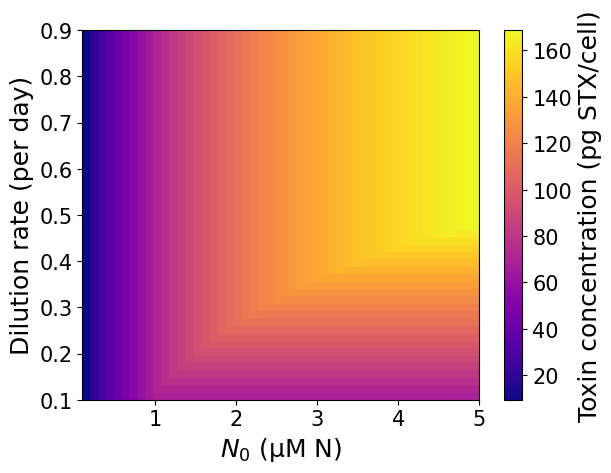

In [133]:
# Define the initial conditions
N_init = 1
P_init = 0.1
X_init = 0



# Define the range of values for N0 and dilution rate
N0_values = np.linspace(0.1, 5, 50)
D_values = np.linspace(0.1, 0.9, 50)

# Define the toxin production fraction delta
delta = 0.1
T=25

# Define an empty matrix to store the values of X for each combination of N0 and dilution rate
X_map = np.zeros((len(D_values), len(N0_values)))

# Loop over each combination of N0 and dilution rate and solve the system of differential equations
for i, D in enumerate(D_values):
    for j, N0 in enumerate(N0_values):
        y0 = [N_init, P_init, X_init]
        sol = odeint(system, [N_init, P_init, X_init], tspan, args=(N0, μ, k, m, D, delta, gamma, n_p, T1, Q10,T))
        X_25 = sol[:, 2]
        X_pg_cell = (X_25 * 14.0067 * 299.29 / 98) * 10**6
        X_map[i, j] = X_pg_cell[-1]

# Plot the 2D map
plt.imshow(X_map, extent=[N0_values.min(), N0_values.max(), D_values.min(), D_values.max()], origin='lower', aspect='auto', cmap='plasma')
cbar= plt.colorbar()
cbar.set_label('Toxin concentration (pg STX/cell)',fontsize=18)
cbar.ax.tick_params(labelsize=15)  # Set fontsize of the colorbar tick labels
plt.xlabel('$N_0$ (µM N)',fontsize=18)
plt.ylabel('Dilution rate (per day)',fontsize=18)
plt.xticks(fontsize=15)  # Augment the font size of x-axis tick labels
plt.yticks(fontsize=15)  # Augment the font size of y-axis tick labels

plt.show()




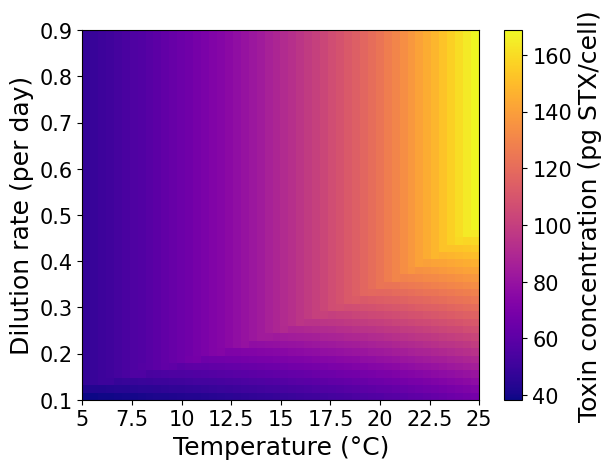

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

# Define the initial conditions
N_init = 1
P_init = 0.1
X_init = 0

# Define the range of values for N0 and dilution rate
T_values = np.linspace(5,25,50)
D_values = np.linspace(0.1, 0.9, 50)

# Define the toxin production fraction delta
delta = 0.1
tspan=np.linspace(0,1000,10000)

# Define an empty matrix to store the values of X for each combination of N0 and dilution rate
X_map = np.zeros((len(D_values), len(T_values)))

# Loop over each combination of N0 and dilution rate and solve the system of differential equations
for i, D in enumerate(D_values):
    for j, T in enumerate(T_values):
        #print(D)
        #print(T)
        y0 = [N_init, P_init, X_init]
        sol = odeint(system, y0, tspan, args=(N0, µ, k, m, D, delta, gamma, n_p, T1, Q10,T))
        X_25 = sol[:, 2]
        X_pg_cell = (X_25 * 14.0067 * 299.29 / 98) * 10**6
        #print(X_pg_cell[-1])
        X_map[i, j] = X_pg_cell[-1]

# Plot the 2D map
plt.imshow(X_map, extent=[T_values.min(), T_values.max(), D_values.min(), D_values.max()], origin='lower', aspect='auto', cmap='plasma')
cbar= plt.colorbar()
cbar.ax.tick_params(labelsize=15)  # Set fontsize of the colorbar tick labels
cbar.set_label('Toxin concentration (pg STX/cell)',fontsize=18)
plt.xlabel('Temperature (°C)',fontsize=18)
plt.ylabel('Dilution rate (per day)',fontsize=18)
plt.xticks(fontsize=15)  # Augment the font size of x-axis tick labels
plt.yticks(fontsize=15)  # Augment the font size of y-axis tick labels

plt.gca().xaxis.set_major_formatter(plt.FormatStrFormatter('%g'))

plt.show()


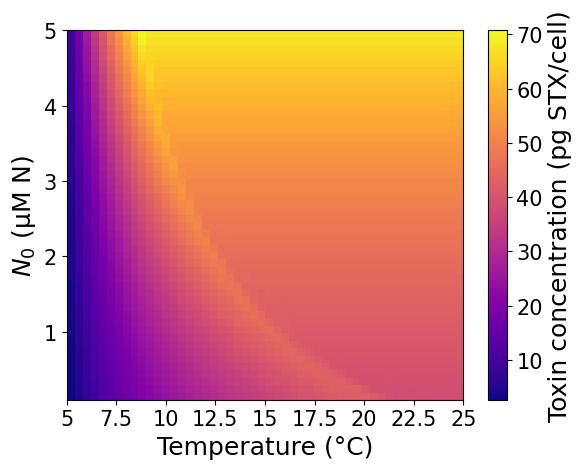

In [111]:
# Define the initial conditions
N_init = 1
P_init = 0.1
X_init = 0



# Define the range of values for N0 and dilution rate
N0_values = np.linspace(0.1, 5, 50)
T_values = np.linspace(5, 25, 50)

# Define the toxin production fraction delta
delta = 0.1
tspan=np.linspace(0,700,1000)


# Define an empty matrix to store the values of X for each combination of N0 and dilution rate
X_map = np.zeros((len(N0_values), len(T_values)))

# Loop over each combination of N0 and dilution rate and solve the system of differential equations
for i, T in enumerate(T_values):
    for j, N0 in enumerate(N0_values):
        y0 = [N_init, P_init, X_init]
        sol = odeint(system, [N_init, P_init, X_init], tspan, args=(N0, μ, k, m, D, delta, gamma, n_p, T1, Q10,T))
        X_25 = sol[:, 2]
        X_pg_cell = (X_25 * 14.0067 * 299.29 / 98) * 10**6
        X_map[i, j] = X_pg_cell[-1]

# Plot the 2D map
plt.imshow(X_map, extent=[T_values.min(), T_values.max(), N0_values.min(), N0_values.max()], origin='lower', aspect='auto', cmap='plasma')
cbar= plt.colorbar()
cbar.ax.tick_params(labelsize=15)  # Set fontsize of the colorbar tick labels
cbar.set_label('Toxin concentration (pg STX/cell)',fontsize=18)
plt.xlabel('Temperature (°C)',fontsize=18)
plt.ylabel('$N_0$ (µM N)',fontsize=18)
#plt.ylim([0,5])
plt.xticks(fontsize=15)  # Augment the font size of x-axis tick labels
plt.yticks(fontsize=15)  # Augment the font size of y-axis tick labels

plt.gca().xaxis.set_major_formatter(plt.FormatStrFormatter('%g'))
plt.show()




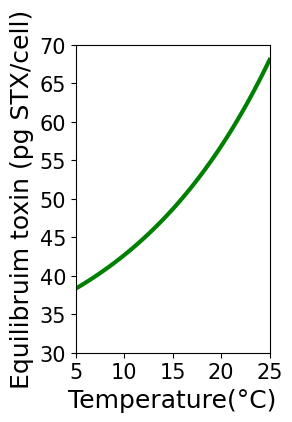

In [201]:
import numpy as np
from scipy.integrate import odeint
import matplotlib.pyplot as plt

def system(y, t, N0, μ, k, m, D, delta, gamma, n_p, T1, Q10,T):
    N, P, X = y

    μ_T = μ * Q10**((T - T1) / 10)
    m_T = m * Q10**((T - T1) / 10)
    dNdt = D * (N0 - N) - μ_T * N / (N + k) * P * n_p
    dPdt = (1 - delta) * μ_T * N / (N + k) * P - (D + m_T) * P
    dXdt = delta * μ_T * N / (N + k) * n_p - gamma * X

    return [dNdt, dPdt, dXdt]

# Define the initial conditions
N_init = 1
P_init = 0.1
X_init = 0

# Define the different values of N0 to be plotted
T_values = np.linspace(5, 25, 50)
#Define the time
t=np.linspace(0,1000,10000)

# Define the dilution rate, delta, and other parameters
D = 0.1
delta = 0.1
μ = 0.69  # Define the value of μ
k = 2.62  # Define the value of k
m = 0.1  # Define the value of m
gamma = 0.2  # Define the value of gamma
n_p = 1.12*10**-5  # Define the value of n_p
T1 = 18  # Define the value of T1
Q10 = 1.88  # Define the value of Q10

# Initialize an empty array to store the final values of X for each N0 value
X_final_values = []

# Solve the system of differential equations for each value of N0 and store the final value of X in X_final_values
for T in T_values:
    sol = odeint(system, [N_init, P_init, X_init], t, args=(N0, μ, k, m, D, delta, gamma, n_p, T1, Q10,T))
    X = sol[:, 2]
    X_pg_cell = (X * 14.0067 * 299.29 / 98) * 10**6
    X_final_values.append(X_pg_cell[-1])

# Plot X as a function of N0

plt.figure("subplot example", figsize=(2.5, 4))


plt.plot(T_values, X_final_values, color='green', linewidth=3)

plt.xlim([5,25])
plt.ylim([30, 70])

plt.xlabel('Temperature(°C)', fontsize=18)
plt.ylabel('Equilibruim toxin (pg STX/cell)', fontsize=18)
plt.xticks(fontsize=15)  # Augment the font size of x-axis tick labels
plt.yticks(fontsize=15)  # Augment the font size of y-axis tick labels
plt.show()


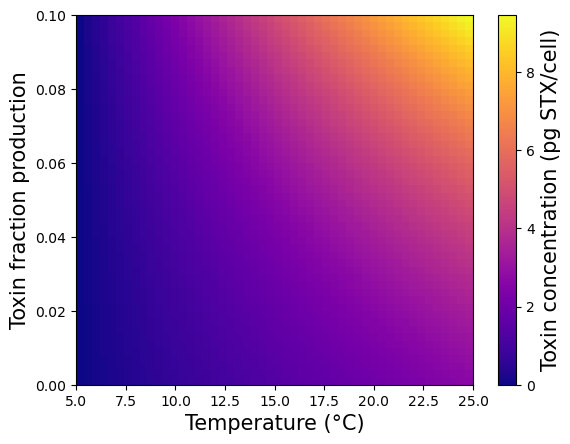

In [60]:


# Define the initial conditions
N_init = 1
P_init = 0.1
X_init = 0



# Define the range of values for N0 and dilution rate
delta_values = np.linspace(0, 0.1, 50)
T_values = np.linspace(5, 25, 50)

# Define the toxin production fraction delta
N0= 30
tspan=np.linspace(0,700,1000)


# Define an empty matrix to store the values of X for each combination of N0 and dilution rate
X_map = np.zeros((len(delta_values), len(T_values)))

# Loop over each combination of N0 and dilution rate and solve the system of differential equations
for i, T in enumerate(T_values):
    for j, N0 in enumerate(delta_values):
        y0 = [N_init, P_init, X_init]
        sol = odeint(system, [N_init, P_init, X_init], tspan, args=(N0, μ, k, m, D, delta, gamma, n_p, T1, Q10, T))

        X_25 = sol[:, 2]
        X_pg_cell = (X_25 * 14.0067 * 299.29 / 98) * 10**6
        X_map[i, j] = X_pg_cell[-1]

# Plot the 2D map
plt.imshow(X_map, extent=[T_values.min(), T_values.max(), delta_values.min(), delta_values.max()], origin='lower', aspect='auto', cmap='plasma')
cbar= plt.colorbar()
cbar.set_label('Toxin concentration (pg STX/cell)',fontsize=15)
plt.xlabel('Temperature (°C)',fontsize=15)
plt.ylabel('Toxin fraction production',fontsize=15)
#plt.ylim([0,5])

plt.show()


